In [4]:
import pandas as pd
import numpy as np
import warnings

In [5]:
warnings.filterwarnings('ignore')

# Get The Dataset

In [41]:
df = pd.read_csv("ml-100k/u.data",sep = '\t',names = ["User_Id","Movie_Id","Rating","TimeStamp"])
df.head()

,User_Id,Movie_Id,Rating,TimeStamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [42]:
df.shape

(100000, 4)

In [43]:
df['User_Id'].nunique()  ## gets unique values in movies

943

In [44]:
df['Movie_Id'].nunique()

1682

In [45]:
# open('ml-100k/u.item', encoding = "ISO-8859-1",)
# Eead('ml-100k/u.item',encoding = "ISO-8859-1")
df2 = pd.read_csv('ml-100k/u.item', sep='|', encoding='latin-1',header = None)
df2.head()
movieTitles = df2[[0,1]]
movieTitles.columns = ["Movie_Id","Movie_Name"]
movieTitles

,Movie_Id,Movie_Name
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)
...,...,...
1677,1678,Mat' i syn (1997)
1678,1679,B. Monkey (1998)
1679,1680,Sliding Doors (1998)
1680,1681,You So Crazy (1994)


In [51]:
df2 = df.merge(movieTitles,on = "Movie_Id")
df2

,User_Id,Movie_Id,Rating,TimeStamp,Movie_Name
0,196,242,3,881250949,Kolya (1996)
1,63,242,3,875747190,Kolya (1996)
2,226,242,5,883888671,Kolya (1996)
3,154,242,3,879138235,Kolya (1996)
4,306,242,5,876503793,Kolya (1996)
...,...,...,...,...,...
99995,840,1674,4,891211682,Mamma Roma (1962)
99996,655,1640,3,888474646,"Eighth Day, The (1996)"
99997,655,1637,3,888984255,Girls Town (1996)
99998,655,1630,3,887428735,"Silence of the Palace, The (Saimt el Qusur) (1..."


# Exploratory Data Analysis

In [113]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style = 'white')


In [93]:
dfrating = pd.DataFrame(df2.groupby('Movie_Name').mean()['Rating'])
dfrating.head()

,Rating
Movie_Name,
'Til There Was You (1997),2.333333
1-900 (1994),2.600000
101 Dalmatians (1996),2.908257
12 Angry Men (1957),4.344000
187 (1997),3.024390


In [94]:
dfcounts = pd.DataFrame(df2.groupby('Movie_Name').count()['Rating'])
dfcounts.head()

,Rating
Movie_Name,
'Til There Was You (1997),9
1-900 (1994),5
101 Dalmatians (1996),109
12 Angry Men (1957),125
187 (1997),41


In [95]:
dfrating['People rated'] = dfcounts
dfrating

,Rating,People rated
Movie_Name,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
187 (1997),3.024390,41
...,...,...
Young Guns II (1990),2.772727,44
"Young Poisoner's Handbook, The (1995)",3.341463,41
Zeus and Roxanne (1997),2.166667,6


In [98]:
dfrating.sort_values(by ='Rating')

,Rating,People rated
Movie_Name,,
"Eye of Vichy, The (Oeil de Vichy, L') (1993)",1.0,1
Butterfly Kiss (1995),1.0,1
Daens (1992),1.0,1
JLG/JLG - autoportrait de décembre (1994),1.0,1
Touki Bouki (Journey of the Hyena) (1973),1.0,1
...,...,...
Someone Else's America (1995),5.0,1
Star Kid (1997),5.0,3
Santa with Muscles (1996),5.0,2


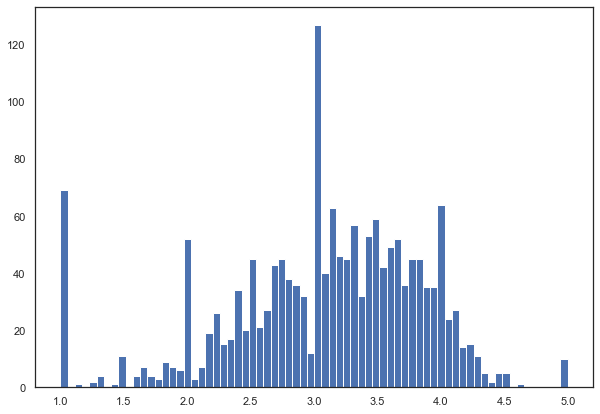

In [115]:
plt.figure(figsize = (10,7))
plt.hist(dfrating['Rating'],bins = 70)    ### 5 aur bas 20 se kaam yaar
plt.show()

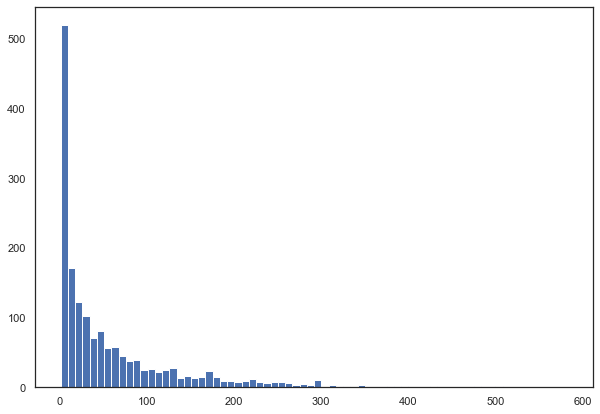

In [117]:
plt.figure(figsize = (10,7))
plt.hist(dfrating['People rated'],bins = 70)  ### 1 rating wali bht h yaar
plt.show()

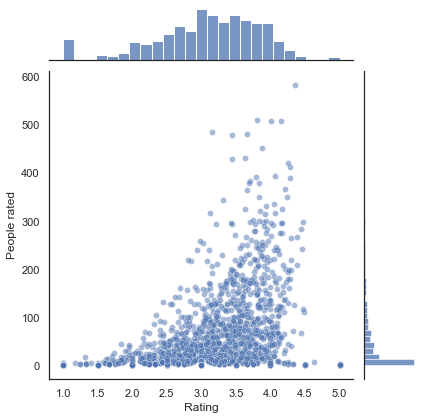

In [119]:
sns.jointplot(x = 'Rating', y = 'People rated',data = dfrating, alpha = 0.5) 


# Creating movie Recommendation 

In [136]:
moviemat = df2.pivot_table(index = 'User_Id', columns = 'Movie_Name',values = 'Rating')
moviemat = pd.DataFrame(df2.pivot_table(index = 'User_Id', columns = 'Movie_Name',values = 'Rating'))
moviemat

Movie_Name,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
User_Id,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,2.0,NaN,NaN,NaN,NaN,4.0,NaN,NaN,...,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,4.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
939,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
940,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
941,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [137]:
dfrating.sort_values(by = "People rated",ascending = False)

,Rating,People rated
Movie_Name,,
Star Wars (1977),4.358491,583
Contact (1997),3.803536,509
Fargo (1996),4.155512,508
Return of the Jedi (1983),4.007890,507
Liar Liar (1997),3.156701,485
...,...,...
"Great Day in Harlem, A (1994)",5.000000,1
"Other Voices, Other Rooms (1997)",3.000000,1
Good Morning (1971),1.000000,1


In [163]:
star_wars = (moviemat['Star Wars (1977)'])
star_wars


User_Id
1      5.0
2      5.0
3      NaN
4      5.0
5      4.0
      ... 
939    NaN
940    4.0
941    NaN
942    5.0
943    4.0
Name: Star Wars (1977), Length: 943, dtype: float64

In [188]:
## Lets find correlation
coorelation = pd.DataFrame(moviemat.corrwith(star_wars),columns = ["Correlation"])
# coorelation
coorelation.dropna(inplace = True)

coorelation.sort_values("Correlation", ascending = False)

newdata = coorelation.join(other = dfcounts , on = "Movie_Name") 

extracted_new_data = newdata[newdata["Rating"]>100]
extracted_new_data.sort_values("Correlation",ascending = False).head()
# coorelation
# pd.DataFrame?


,Correlation,Rating
Movie_Name,,
Star Wars (1977),1.000000,583
"Empire Strikes Back, The (1980)",0.747981,367
Return of the Jedi (1983),0.672556,507
Raiders of the Lost Ark (1981),0.536117,420
Austin Powers: International Man of Mystery (1997),0.377433,130


# Recommendation Function

In [204]:
def suggestAMovie(moviename):
    movie = moviename
    
    getUsersReview =  moviemat[moviename]
    coorelationWithMovies = pd.DataFrame(moviemat.corrwith(getUsersReview),columns = ["Correlation"])
    coorelationWithMovies.dropna(inplace = True)
    coorelationWithMovies.sort_values("Correlation", ascending = False)
    Jointables = coorelationWithMovies.join(other = dfcounts , on = "Movie_Name") 
    extracted_new_data_values = Jointables[Jointables["Rating"]>100]
    value = extracted_new_data_values.sort_values("Correlation",ascending = False).head()
    ans = pd.DataFrame(value)
    return ans
 


# User can enter the movie

In [211]:
suggestAMovie("Raiders of the Lost Ark (1981)")

,Correlation,Rating
Movie_Name,,
Raiders of the Lost Ark (1981),1.000000,420
Indiana Jones and the Last Crusade (1989),0.539606,331
"Empire Strikes Back, The (1980)",0.538659,367
Star Wars (1977),0.536117,583
Back to the Future (1985),0.506807,350
